<a href="https://colab.research.google.com/github/isaacmikhail/TelecomX_challenge_Alura/blob/main/TelecomX_challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
url='https://raw.githubusercontent.com/ingridcristh/challenge2-data-science/refs/heads/main/TelecomX_Data.json'

In [3]:
DataFrame=pd.read_json(url)
DataFrame

,customerID,Churn,customer,phone,internet,account
0,0002-ORFBO,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
1,0003-MKNFE,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
2,0004-TLHLJ,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
3,0011-IGKFF,Yes,"{'gender': 'Male', 'SeniorCitizen': 1, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
4,0013-EXCHZ,Yes,"{'gender': 'Female', 'SeniorCitizen': 1, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
...,...,...,...,...,...,...
7262,9987-LUTYD,No,"{'gender': 'Female', 'SeniorCitizen': 0, 'Part...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'One year', 'PaperlessBilling': '..."
7263,9992-RRAMN,Yes,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'Yes'}","{'InternetService': 'Fiber optic', 'OnlineSecu...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7264,9992-UJOEL,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Month-to-month', 'PaperlessBilli..."
7265,9993-LHIEB,No,"{'gender': 'Male', 'SeniorCitizen': 0, 'Partne...","{'PhoneService': 'Yes', 'MultipleLines': 'No'}","{'InternetService': 'DSL', 'OnlineSecurity': '...","{'Contract': 'Two year', 'PaperlessBilling': '..."


In [4]:
# Normaliza cada coluna aninhada
account_df = pd.json_normalize(DataFrame['account'])
internet_df = pd.json_normalize(DataFrame['internet'])
phone_df = pd.json_normalize(DataFrame['phone'])
customer_df = pd.json_normalize(DataFrame['customer'])

# Junta tudo com as colunas simples
base_df = pd.concat([DataFrame[['customerID', 'Churn']], customer_df, phone_df, internet_df, account_df], axis=1)


In [5]:
base_df['PerfilCliente'] = base_df.apply(
    lambda row: (
        'Internet e Telefone' if row['PhoneService'] == 'Yes' and row['InternetService'] != 'No'
        else 'Só Internet' if row['PhoneService'] == 'No' and row['InternetService'] != 'No'
        else 'Só Telefone' if row['PhoneService'] == 'Yes' and row['InternetService'] == 'No'
        else 'Sem serviço'
    ),
    axis=1
)

In [6]:
base_df['PerfilCliente'].value_counts()

,count
PerfilCliente,
Internet e Telefone,4979
Só Telefone,1581
Só Internet,707


In [7]:
for col in base_df.select_dtypes(include='object').columns:
    base_df[col] = base_df[col].str.strip()

In [8]:
for col in base_df.select_dtypes(include='object').columns:
    base_df[col] = base_df[col].str.lower()

In [9]:
for col in base_df.select_dtypes(include='object').columns:
    print(f"{col}: {base_df[col].unique()}")

customerID: ['0002-orfbo' '0003-mknfe' '0004-tlhlj' ... '9992-ujoel' '9993-lhieb'
 '9995-hotoh']
Churn: ['no' 'yes' '']
gender: ['female' 'male']
Partner: ['yes' 'no']
Dependents: ['yes' 'no']
PhoneService: ['yes' 'no']
MultipleLines: ['no' 'yes' 'no phone service']
InternetService: ['dsl' 'fiber optic' 'no']
OnlineSecurity: ['no' 'yes' 'no internet service']
OnlineBackup: ['yes' 'no' 'no internet service']
DeviceProtection: ['no' 'yes' 'no internet service']
TechSupport: ['yes' 'no' 'no internet service']
StreamingTV: ['yes' 'no' 'no internet service']
StreamingMovies: ['no' 'yes' 'no internet service']
Contract: ['one year' 'month-to-month' 'two year']
PaperlessBilling: ['yes' 'no']
PaymentMethod: ['mailed check' 'electronic check' 'credit card (automatic)'
 'bank transfer (automatic)']
Charges.Total: ['593.3' '542.4' '280.85' ... '742.9' '4627.65' '3707.6']
PerfilCliente: ['internet e telefone' 'só internet' 'só telefone']


In [10]:
# Apenas clientes com ambos os serviços
clientes_completos = base_df[base_df['PerfilCliente'] == 'Internet e Telefone']

# Apenas clientes com internet
clientes_internet = base_df[base_df['PerfilCliente'] == 'Só Internet']

In [11]:
base_df['Charges.Total'].apply(lambda x: isinstance(x, str)).sum()

np.int64(7267)

In [12]:
customer_df.isnull().sum()
internet_df.isnull().sum()
phone_df.isnull().sum()
account_df.isnull().sum()


,0
Contract,0
PaperlessBilling,0
PaymentMethod,0
Charges.Monthly,0
Charges.Total,0


In [13]:
phone_df = phone_df[phone_df['PhoneService'] == 'Yes']


In [14]:
internet_df = internet_df[internet_df['InternetService'] != 'No']


In [15]:
phone_df = phone_df[phone_df['MultipleLines'] != 'No phone service']


In [16]:
base_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PerfilCliente
0,0002-orfbo,no,female,0,yes,yes,9,yes,no,dsl,...,no,yes,yes,no,one year,yes,mailed check,65.60,593.3,internet e telefone
1,0003-mknfe,no,male,0,no,no,9,yes,yes,dsl,...,no,no,no,yes,month-to-month,no,mailed check,59.90,542.4,internet e telefone
2,0004-tlhlj,yes,male,0,no,no,4,yes,no,fiber optic,...,yes,no,no,no,month-to-month,yes,electronic check,73.90,280.85,internet e telefone
3,0011-igkff,yes,male,1,yes,no,13,yes,no,fiber optic,...,yes,no,yes,yes,month-to-month,yes,electronic check,98.00,1237.85,internet e telefone
4,0013-exchz,yes,female,1,yes,no,3,yes,no,fiber optic,...,no,yes,yes,no,month-to-month,yes,mailed check,83.90,267.4,internet e telefone
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,no,female,0,no,no,13,yes,no,dsl,...,no,yes,no,no,one year,no,mailed check,55.15,742.9,internet e telefone
7263,9992-rramn,yes,male,0,yes,no,22,yes,yes,fiber optic,...,no,no,no,yes,month-to-month,yes,electronic check,85.10,1873.7,internet e telefone
7264,9992-ujoel,no,male,0,no,no,2,yes,no,dsl,...,no,no,no,no,month-to-month,yes,mailed check,50.30,92.75,internet e telefone
7265,9993-lhieb,no,male,0,yes,yes,67,yes,no,dsl,...,yes,yes,no,yes,two year,no,mailed check,67.85,4627.65,internet e telefone


In [17]:
base_df.duplicated().sum()


np.int64(0)

In [18]:
base_df.dtypes

,0
customerID,object
Churn,object
gender,object
SeniorCitizen,int64
Partner,object
Dependents,object
tenure,int64
PhoneService,object
MultipleLines,object
InternetService,object


In [19]:
bool_cols=['SeniorCitizen']
for col in bool_cols:
  base_df[col]=base_df[col].map({1:True, 0:False})

base_df[col] = base_df[col].astype(bool)



#base_df[col] = base_df[col].astype(bool)

In [20]:
bool_cols=['Churn','MultipleLines','DeviceProtection','OnlineSecurity','OnlineBackup','TechSupport','StreamingTV','PaperlessBilling','StreamingMovies','Partner',	'Dependents','PhoneService']

for col in bool_cols:
    base_df[col] = base_df[col].map({'yes': True, 'no': False}).astype(bool)



In [21]:
base_df['Charges.Total'] = pd.to_numeric(base_df['Charges.Total'], errors='coerce')

In [22]:
base_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7267 entries, 0 to 7266
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7267 non-null   object 
 1   Churn             7267 non-null   bool   
 2   gender            7267 non-null   object 
 3   SeniorCitizen     7267 non-null   bool   
 4   Partner           7267 non-null   bool   
 5   Dependents        7267 non-null   bool   
 6   tenure            7267 non-null   int64  
 7   PhoneService      7267 non-null   bool   
 8   MultipleLines     7267 non-null   bool   
 9   InternetService   7267 non-null   object 
 10  OnlineSecurity    7267 non-null   bool   
 11  OnlineBackup      7267 non-null   bool   
 12  DeviceProtection  7267 non-null   bool   
 13  TechSupport       7267 non-null   bool   
 14  StreamingTV       7267 non-null   bool   
 15  StreamingMovies   7267 non-null   bool   
 16  Contract          7267 non-null   object 


In [23]:
base_df[(base_df['PhoneService'] == False) & (base_df['MultipleLines'] != 'No')]

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PerfilCliente
10,0017-dinoc,False,male,False,False,False,54,False,True,dsl,...,False,True,True,False,two year,False,credit card (automatic),45.20,2460.55,só internet
14,0019-gfntw,False,female,False,False,False,56,False,True,dsl,...,True,True,False,False,two year,False,bank transfer (automatic),45.05,2560.10,só internet
16,0020-jdnxp,False,female,False,True,True,34,False,True,dsl,...,True,True,True,True,one year,False,mailed check,61.25,1993.20,só internet
19,0023-hghwl,True,male,True,False,False,1,False,True,dsl,...,False,False,False,False,month-to-month,True,electronic check,25.10,25.10,só internet
25,0032-pgels,True,female,False,True,True,1,False,True,dsl,...,False,False,False,False,month-to-month,False,bank transfer (automatic),30.50,30.50,só internet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7200,9906-nhhvc,False,female,True,False,False,65,False,True,dsl,...,True,False,True,True,two year,True,bank transfer (automatic),53.50,3517.90,só internet
7201,9907-swkkf,True,female,True,False,False,1,False,True,dsl,...,False,False,False,False,month-to-month,False,mailed check,25.05,25.05,só internet
7218,9928-bzvlz,False,female,False,False,False,12,False,True,dsl,...,True,True,False,True,two year,False,mailed check,49.85,552.10,só internet
7238,9955-qopoy,False,male,False,True,False,69,False,True,dsl,...,True,True,True,True,one year,True,credit card (automatic),60.80,4263.40,só internet


In [24]:
base_df['customerID'].duplicated().sum()

np.int64(0)

<Axes: xlabel='Charges.Total', ylabel='Count'>

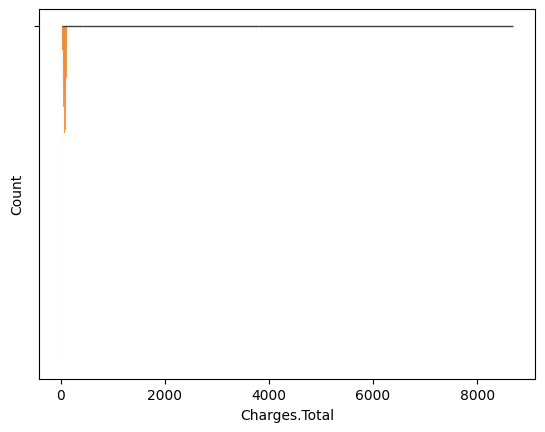

In [25]:
sns.boxplot(x=base_df['Charges.Total'])  # Outliers
sns.histplot(base_df['Charges.Monthly'], bins=30)  # Distribuição

In [26]:
base_df['SeniorCitizen'].value_counts(normalize=True)

,proportion
SeniorCitizen,
False,0.837347
True,0.162653


In [27]:
#valor diário por tempo de contrato

base_df['conta_diaria']=base_df['Charges.Monthly']/30
base_df['conta_diaria']

,conta_diaria
0,2.186667
1,1.996667
2,2.463333
3,3.266667
4,2.796667
...,...
7262,1.838333
7263,2.836667
7264,1.676667
7265,2.261667


In [28]:
#validação
#análise descritiva
base_df[['Charges.Monthly', 'conta_diaria']].describe()

,Charges.Monthly,conta_diaria
count,7267.000000,7267.000000
mean,64.720098,2.157337
std,30.129572,1.004319
min,18.250000,0.608333
25%,35.425000,1.180833
50%,70.300000,2.343333
75%,89.875000,2.995833
max,118.750000,3.958333


In [29]:
#valor diário em relação ao tempo
base_df['total_pago']=base_df['conta_diaria']*base_df['tenure']*30
base_df['total_pago']

,total_pago
0,590.40
1,539.10
2,295.60
3,1274.00
4,251.70
...,...
7262,716.95
7263,1872.20
7264,100.60
7265,4545.95


In [30]:
base_df

,customerID,Churn,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Charges.Monthly,Charges.Total,PerfilCliente,conta_diaria,total_pago
0,0002-orfbo,False,female,False,True,True,9,True,False,dsl,...,True,False,one year,True,mailed check,65.60,593.30,internet e telefone,2.186667,590.40
1,0003-mknfe,False,male,False,False,False,9,True,True,dsl,...,False,True,month-to-month,False,mailed check,59.90,542.40,internet e telefone,1.996667,539.10
2,0004-tlhlj,True,male,False,False,False,4,True,False,fiber optic,...,False,False,month-to-month,True,electronic check,73.90,280.85,internet e telefone,2.463333,295.60
3,0011-igkff,True,male,True,True,False,13,True,False,fiber optic,...,True,True,month-to-month,True,electronic check,98.00,1237.85,internet e telefone,3.266667,1274.00
4,0013-exchz,True,female,True,True,False,3,True,False,fiber optic,...,True,False,month-to-month,True,mailed check,83.90,267.40,internet e telefone,2.796667,251.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7262,9987-lutyd,False,female,False,False,False,13,True,False,dsl,...,False,False,one year,False,mailed check,55.15,742.90,internet e telefone,1.838333,716.95
7263,9992-rramn,True,male,False,True,False,22,True,True,fiber optic,...,False,True,month-to-month,True,electronic check,85.10,1873.70,internet e telefone,2.836667,1872.20
7264,9992-ujoel,False,male,False,False,False,2,True,False,dsl,...,False,False,month-to-month,True,mailed check,50.30,92.75,internet e telefone,1.676667,100.60
7265,9993-lhieb,False,male,False,True,True,67,True,False,dsl,...,False,True,two year,False,mailed check,67.85,4627.65,internet e telefone,2.261667,4545.95


In [31]:
#distribuição da evasão
base_df['Churn'].value_counts()
base_df['Churn'].value_counts(normalize=True)*100

,proportion
Churn,
False,71.198569
True,28.801431


In [32]:
#Contagem de Evasão por Variáveis Categóricas

def analisar_churn_categ(col):
    tabela=pd.crosstab(base_df[col],base_df['Churn'], normalize='index')*100
    print(f'\nChurn por {col}:\n', tabela.round(2))

    sns.countplot(data=base_df, x=col, hue='Churn',palette='Set2')
    plt.title(f'Churn por {col}')
    plt.xticks(rotation=45)
    plt.show


Churn por gender:
 Churn   False  True 
gender              
female  70.96  29.04
male    71.43  28.57


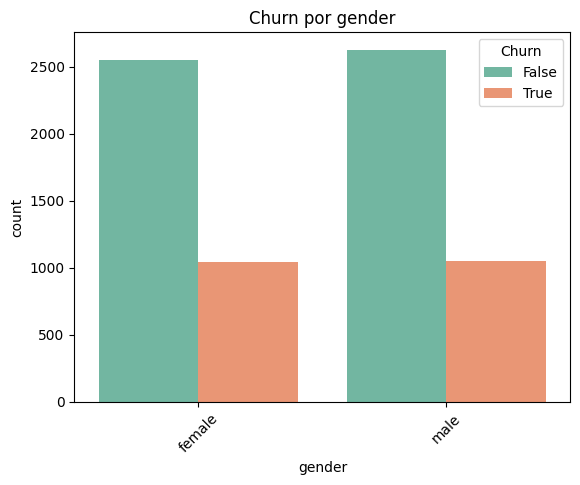

In [33]:
analisar_churn_categ('gender')



Churn por Contract:
 Churn           False  True 
Contract                    
month-to-month  55.43  44.57
one year        86.04  13.96
two year        94.49   5.51


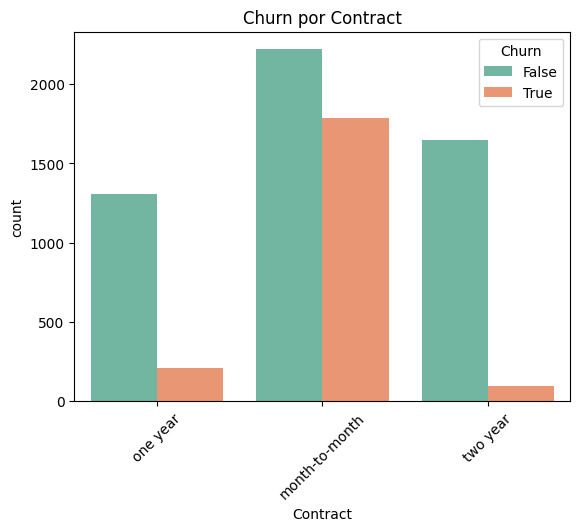

In [34]:
analisar_churn_categ('Contract')



Churn por Partner:
 Churn    False  True 
Partner              
False    65.11  34.89
True     77.69  22.31


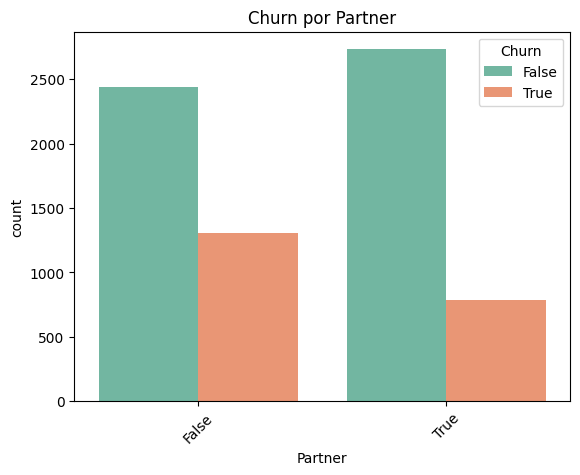

In [35]:
analisar_churn_categ('Partner')



Churn por StreamingTV:
 Churn        False  True 
StreamingTV              
False        64.50  35.50
True         75.63  24.37


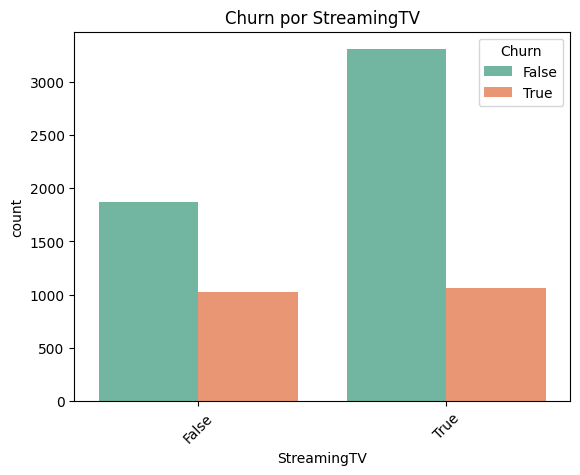

In [36]:
analisar_churn_categ('StreamingTV')


Churn por SeniorCitizen:
 Churn          False  True 
SeniorCitizen              
False          74.08  25.92
True           56.35  43.65


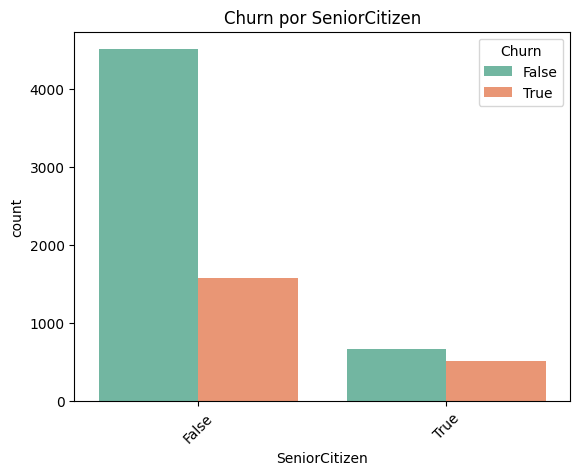

In [37]:
analisar_churn_categ('SeniorCitizen')


Churn por InternetService:
 Churn            False  True 
InternetService              
dsl              78.86  21.14
fiber optic      56.25  43.75
no               89.37  10.63


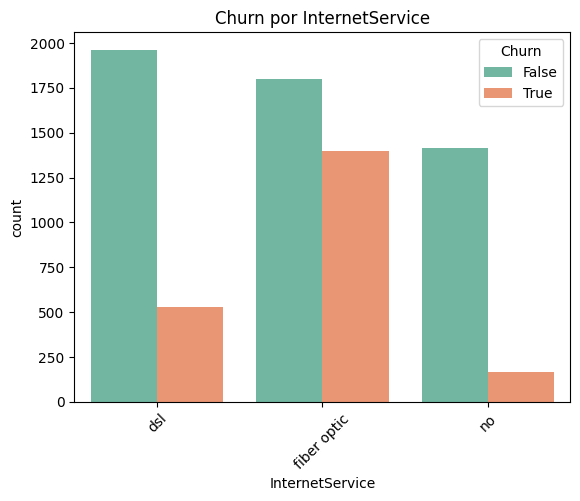

In [38]:
analisar_churn_categ('InternetService')


Churn por StreamingMovies:
 Churn            False  True 
StreamingMovies              
False            64.36  35.64
True             75.67  24.33


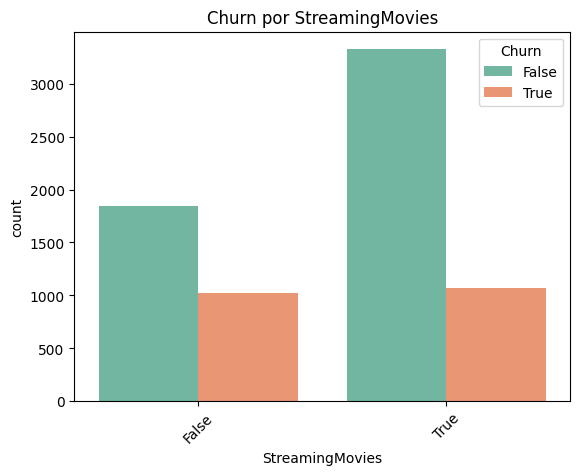

In [39]:
analisar_churn_categ('StreamingMovies')


Churn por Dependents:
 Churn       False  True 
Dependents              
False       66.65  33.35
True        81.80  18.20


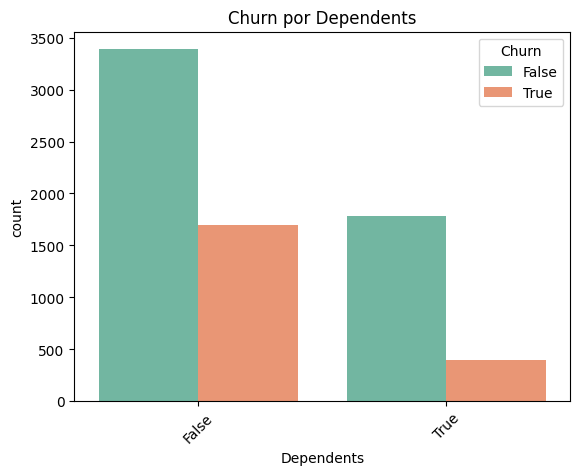

In [40]:
analisar_churn_categ('Dependents')


Churn por PhoneService:
 Churn         False  True 
PhoneService              
False         72.42  27.58
True          71.07  28.93


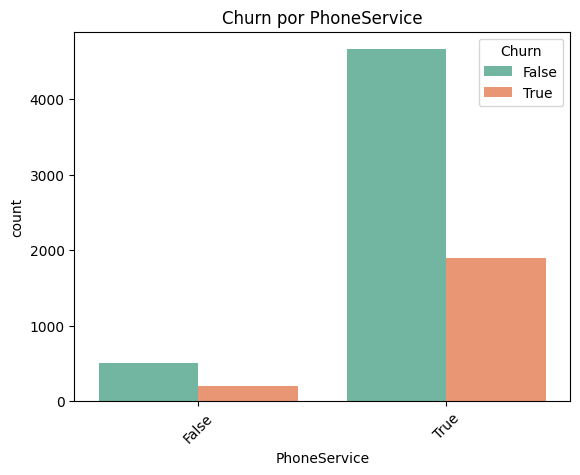

In [41]:
analisar_churn_categ('PhoneService')


Churn por MultipleLines:
 Churn          False  True 
MultipleLines              
False           72.7   27.3
True            69.8   30.2


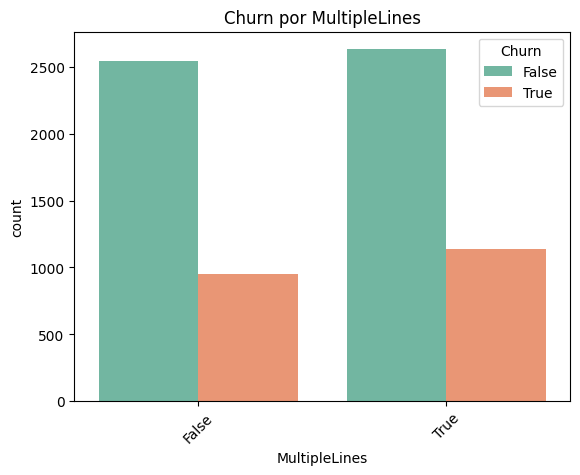

In [42]:
analisar_churn_categ('MultipleLines')


Churn por PaperlessBilling:
 Churn             False  True 
PaperlessBilling              
False             81.29  18.71
True              64.28  35.72


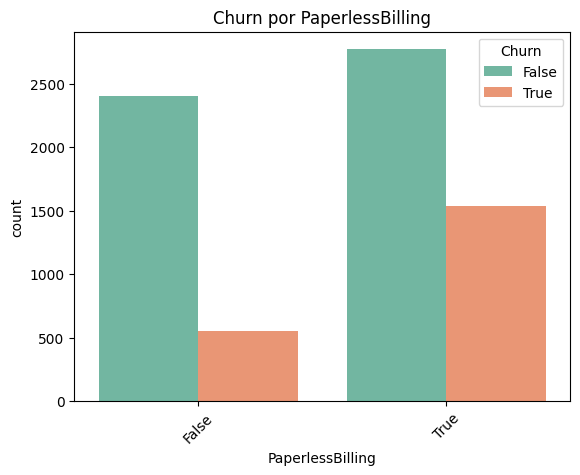

In [43]:
analisar_churn_categ('PaperlessBilling')


Churn por PaymentMethod:
 Churn                      False  True 
PaymentMethod                          
bank transfer (automatic)  80.93  19.07
credit card (automatic)    82.27  17.73
electronic check           52.92  47.08
mailed check               78.32  21.68


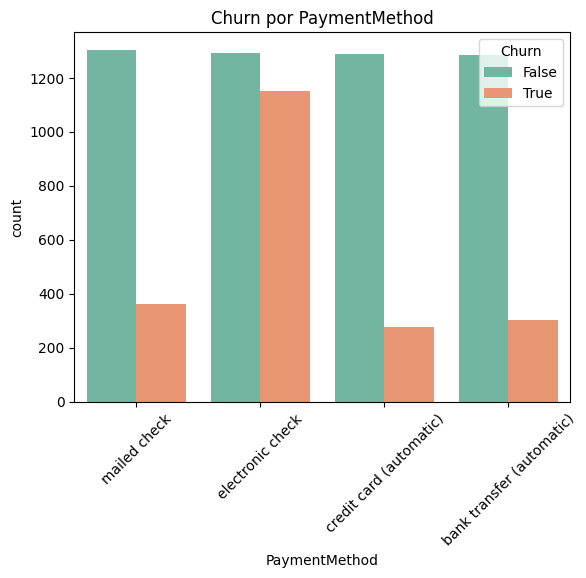

In [44]:
analisar_churn_categ('PaymentMethod')

In [45]:
#Contagem de Evasão por Variáveis Categóricas

def analisar_churn_categNum(col):
    tabela=pd.crosstab(base_df[col],base_df['Churn'], normalize='index')*100
    print(f'\nChurn por {col}:\n', tabela.round(2))

    sns.kdeplot(data=base_df[base_df['Churn'] == True][col], label='Churn', shade=True)
    sns.kdeplot(data=base_df[base_df['Churn'] == False][col], label='Não Churn', shade=True)
    plt.title(f'Densidade de {col} por Churn')
    plt.xlabel('Meses de Contrato')
    plt.legend()
    plt.show()



Churn por tenure:
 Churn    False  True 
tenure               
0       100.00   0.00
1        36.75  63.25
2        46.75  53.25
3        51.21  48.79
4        50.27  49.73
...        ...    ...
68       87.50  12.50
69       87.00  13.00
70       88.52  11.48
71       93.18   6.82
72       96.48   3.52

[73 rows x 2 columns]


/tmp/ipython-input-680885220.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=base_df[base_df['Churn'] == True][col], label='Churn', shade=True)
/tmp/ipython-input-680885220.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=base_df[base_df['Churn'] == False][col], label='Não Churn', shade=True)


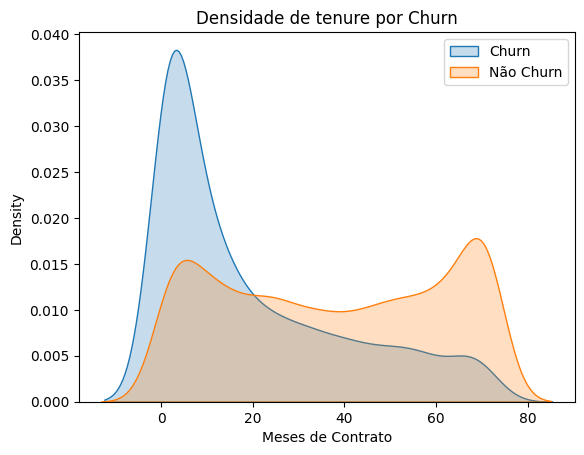

In [46]:
analisar_churn_categNum('tenure')


Churn por Charges.Monthly:
 Churn            False  True 
Charges.Monthly              
18.25            100.0    0.0
18.40            100.0    0.0
18.55            100.0    0.0
18.70            100.0    0.0
18.75             50.0   50.0
...                ...    ...
118.20           100.0    0.0
118.35             0.0  100.0
118.60           100.0    0.0
118.65           100.0    0.0
118.75           100.0    0.0

[1585 rows x 2 columns]


/tmp/ipython-input-680885220.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=base_df[base_df['Churn'] == True][col], label='Churn', shade=True)
/tmp/ipython-input-680885220.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=base_df[base_df['Churn'] == False][col], label='Não Churn', shade=True)


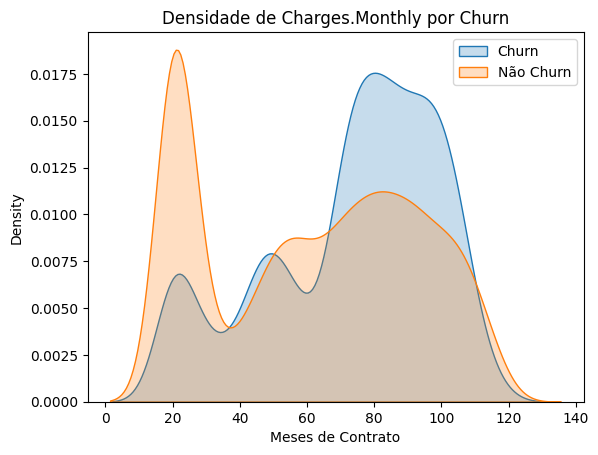

In [47]:
analisar_churn_categNum('Charges.Monthly')


Churn por Charges.Total:
 Churn          False  True 
Charges.Total              
18.80          100.0    0.0
18.85           50.0   50.0
18.90           50.0   50.0
19.00          100.0    0.0
19.05          100.0    0.0
...              ...    ...
8564.75        100.0    0.0
8594.40        100.0    0.0
8670.10        100.0    0.0
8672.45        100.0    0.0
8684.80          0.0  100.0

[6530 rows x 2 columns]


/tmp/ipython-input-680885220.py:7: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=base_df[base_df['Churn'] == True][col], label='Churn', shade=True)
/tmp/ipython-input-680885220.py:8: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data=base_df[base_df['Churn'] == False][col], label='Não Churn', shade=True)


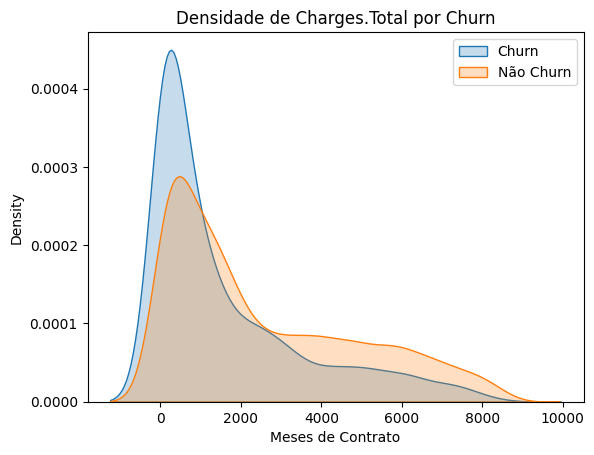

In [48]:
analisar_churn_categNum('Charges.Total')

Relatório de Análise de Evasão de Clientes (Churn)

Este relatório tem como objetivo analisar o comportamento de evasão de clientes (churn) em uma empresa de serviços de telecomunicação. A evasão representa clientes que cancelaram seus contratos, impactando diretamente a receita e a sustentabilidade do negócio. Através da análise dos dados disponíveis, buscamos identificar padrões que possam explicar o churn e propor estratégias para reduzi-lo.

Limpeza e Tratamento de Dados
- Importação e estruturação: Os dados foram importados e descompactados a partir de colunas aninhadas (account, internet, phone, customer) usando pd.json_normalize, resultando em um DataFrame consolidado (base_df).
- Remoção de inconsistências:
- Padronização de valores categóricos (Yes/No, capitalização, espaços).
- Conversão de colunas binárias para tipo bool.
- Criação de perfis de clientes com base nos serviços contratados (Internet e Telefone, Só Internet, etc.).
- Validação de integridade:
- Verificação de duplicatas e valores nulos (nenhum encontrado).
- Aplicação de regras lógicas entre colunas (ex: MultipleLines só faz sentido se PhoneService for Yes).
- Criação de métricas derivadas:
- conta_diaria: valor médio diário baseado em MonthlyCharges.
- Total_Pago: estimativa de valor total pago com base em tenure.

Análise Exploratória de Dados
 Distribuição de Churn
- A maioria dos clientes permaneceu, mas uma parcela significativa apresentou churn.
- Gráficos de barras e pizza foram utilizados para visualizar essa proporção.
 Relação entre Churn e Variáveis Categóricas
- Clientes com contratos mensais apresentaram maior taxa de churn.
- Pagamentos via boleto eletrônico também mostraram maior evasão.
- Clientes sem parceiro ou dependentes tiveram churn mais elevado.
- Serviços como segurança online e suporte técnico estão associados a menor churn.
 Relação entre Churn e Variáveis Numéricas
- Tenure: clientes com menor tempo de contrato têm maior propensão ao churn.
- MonthlyCharges: valores mais altos estão levemente associados ao churn.
- Visualizações como boxplots, histogramas e KDE plots foram utilizadas para evidenciar esses padrões.

 Conclusões e Insights
- O churn está concentrado em clientes com contratos curtos e menor tempo de relacionamento.
- Métodos de pagamento menos automatizados (como boleto) estão ligados à maior evasão.
- A ausência de serviços adicionais (como segurança online e suporte técnico) pode indicar menor engajamento e maior risco de cancelamento.
- Perfis com menor vínculo emocional ou familiar (sem parceiro/dependentes) também apresentam maior churn.
